In [1]:
import pandas
import matplotlib.pyplot
import seaborn

import espn_fantasy_rugby.team_selector

In [2]:
features = ['OPP', 'POS', 'SM']
target = 'MDP'

espn_data = pandas.concat(
    pandas.read_excel(
        '../data/espn_rugby_data.xlsx',
        sheet_name=None
    ),
    ignore_index=True
)

manager_data = pandas.read_csv('../data/manager_round_points.csv')
manager_data['TOTAL_POINTS'] = manager_data.groupby('MANAGER')['POINTS'].cumsum()

In [3]:
espn_data[espn_data['NAME']=='P OMahony']

,NAME,TEAM,OPP,POS,RATING,2018,SM,SUB,T,A,...,YC,RC,MOM,5T,50M,LO,TSB,PTS,MDP,ROUND
44,P OMahony,IRE,ENG,BR,5,0,1,0,0,0,...,0,0,0,1,0,1,0.28,27,4,1
237,P OMahony,IRE,SCO,BR,5,0,1,0,0,0,...,0,0,1,1,0,0,0.28,27,8,2
468,P OMahony,IRE,ITA,BR,5,0,1,0,0,0,...,0,0,1,2,0,1,0.28,27,10,3
756,P OMahony,IRE,FRA,BR,5,0,1,0,0,0,...,0,0,0,1,0,0,0.28,27,3,4
1013,P OMahony,IRE,WAL,BR,5,0,1,0,0,0,...,0,0,0,0,0,0,0.28,27,2,5


In [4]:
first_round_players = [
    'T Furlong',
    'R Best',
    'J George',
    'P Willemse',
    'M Itoje',
    'A Steyn',
    'J Tipuric',
    'B Vunipola',
    'C Murray',
    'J Sexton',
    'J Adams',
    'J Davies',
    'D Penaud',
    'S Hogg',
    'B Kinghorn'
]

In [5]:
initial_team = espn_fantasy_rugby.team_selector.get_initial_team(first_round_players, espn_data)

In [6]:
initial_team.sort_values('POS')

,NAME,TEAM,POS
4,J Tipuric,WAL,BR
7,A Steyn,ITA,BR
8,B Vunipola,ENG,BR
13,J Davies,WAL,C
14,D Penaud,FRA,C
2,J Sexton,IRE,FH
5,J George,ENG,FR
11,R Best,IRE,FR
12,T Furlong,IRE,FR
0,B Kinghorn,SCO,OB


In [7]:
team_each_round = espn_fantasy_rugby.team_selector.simulate_tournament(espn_data, initial_team, features, target)

ESPN Fantasy Rugby:
MAXIMIZE
1.0*Player_A_Allan + 3.0*Player_A_Beard + 2.0*Player_A_Conway + 7.0*Player_A_Davies + 7.0*Player_A_Dell + 3.0*Player_A_Dupont + 7.0*Player_A_Esposito + 1.0*Player_A_Hastings + 5.0*Player_A_Iturria + 1.0*Player_A_Lovotti + 1.0*Player_A_Porter + 7.0*Player_A_Steyn + 5.0*Player_A_Wainwright + 4.0*Player_B_Aki + 1.0*Player_B_Moon + 3.0*Player_B_Serin + 1.0*Player_B_Toolis + 5.0*Player_B_Vunipola + 7.0*Player_B_Youngs + 8.0*Player_C_Ashton + 1.0*Player_C_Canna + 4.0*Player_C_Farrell + 4.0*Player_C_Healy + 3.0*Player_C_Lawes + 6.0*Player_C_Lopez + 8.0*Player_C_Murray + 1.0*Player_C_Traore + 1.0*Player_D_Aldegheri + 6.0*Player_D_Bamba + 8.0*Player_D_Biggar + 1.0*Player_D_Budd + 1.0*Player_D_Cherry + 1.0*Player_D_Cole + 1.0*Player_D_Kilcoyne + 2.0*Player_D_Penaud + 1.0*Player_D_Priso + 1.0*Player_D_Rae + 1.0*Player_D_Robson + 7.0*Player_D_Sisi + 1.0*Player_D_Toner + 8.0*Player_E_Daly + 3.0*Player_E_Dee + 1.0*Player_E_Falgoux + 1.0*Player_E_Genge + 1.0*Player_E_Make

ESPN Fantasy Rugby:
MAXIMIZE
1.0*Player_A_Allan + 1.0*Player_A_Belleau + 1.0*Player_A_Conway + 2.0*Player_A_Davies + 4.0*Player_A_Dell + 8.0*Player_A_Dupont + 5.0*Player_A_Esposito + 1.0*Player_A_Hastings + 5.0*Player_A_Iturria + 5.0*Player_A_Lovotti + 1.0*Player_A_Price + 5.0*Player_A_Steyn + 3.0*Player_A_Wyn_Jones + 4.0*Player_B_Aki + 10.0*Player_B_Kinghorn + 3.0*Player_B_Moon + 1.0*Player_B_Toolis + 6.0*Player_B_Vunipola + 5.0*Player_B_Youngs + 1.0*Player_C_Canna + 4.0*Player_C_Farrell + 3.0*Player_C_Hill + 3.0*Player_C_Lawes + 2.0*Player_C_Lopez + 5.0*Player_C_Murray + 1.0*Player_C_Stander + 1.0*Player_D_Aldegheri + 4.0*Player_D_Bamba + 1.0*Player_D_Biggar + 5.0*Player_D_Budd + 1.0*Player_D_Cherry + 1.0*Player_D_Cole + 3.0*Player_D_Kilcoyne + 1.0*Player_D_Lewis + 4.0*Player_D_Penaud + 1.0*Player_D_Priso + 1.0*Player_D_Rae + 1.0*Player_D_Robson + 6.0*Player_E_Daly + 1.0*Player_E_Dee + 1.0*Player_E_Falgoux + 1.0*Player_E_Genge + 5.0*Player_E_Padovani + 1.0*Player_F_Brown + 5.0*Player

ESPN Fantasy Rugby:
MAXIMIZE
1.0*Player_A_Allan + 5.0*Player_A_Beard + 4.0*Player_A_Dell + 4.0*Player_A_Dupont + 5.0*Player_A_Esposito + 5.0*Player_A_Iturria + 4.0*Player_A_Lovotti + 1.0*Player_A_Porter + 4.0*Player_A_Price + 4.0*Player_A_Steyn + 2.0*Player_A_Wainwright + 5.0*Player_A_Wyn_Jones + 6.0*Player_B_Aki + 1.0*Player_B_Earl + 5.0*Player_B_Kinghorn + 5.0*Player_B_Shields + 3.0*Player_B_Teo + 1.0*Player_B_Toolis + 5.0*Player_B_Vunipola + 7.0*Player_B_Youngs + 1.0*Player_C_Ashton + 2.0*Player_C_Blade + 1.0*Player_C_Canna + 4.0*Player_C_Healy + 1.0*Player_C_Hill + 5.0*Player_C_Murray + 4.0*Player_C_Stander + 1.0*Player_C_Traore + 5.0*Player_D_Bamba + 2.0*Player_D_Biggar + 4.0*Player_D_Budd + 1.0*Player_D_Cherry + 5.0*Player_D_Graham + 1.0*Player_D_Kilcoyne + 7.0*Player_D_Penaud + 1.0*Player_D_Rae + 1.0*Player_D_Robson + 1.0*Player_D_Toner + 9.0*Player_E_Daly + 3.0*Player_E_Genge + 2.0*Player_E_Gori + 1.0*Player_E_Makelara + 5.0*Player_E_Padovani + 1.0*Player_F_Brown + 6.0*Player_F

ESPN Fantasy Rugby:
MAXIMIZE
1.0*Player_A_Allan + 6.0*Player_A_Beard + 1.0*Player_A_Davies + 4.0*Player_A_Dell + 6.0*Player_A_Dupont + 7.0*Player_A_Esposito + 1.0*Player_A_Hastings + 1.0*Player_A_Iturria + 5.0*Player_A_Lovotti + 4.0*Player_A_Price + 4.0*Player_A_Steyn + 1.0*Player_A_Wainwright + 6.0*Player_A_Wyn_Jones + 1.0*Player_A_Zanni + 4.0*Player_B_Aki + 2.0*Player_B_Earl + 1.0*Player_B_Le_Roux + 4.0*Player_B_McGuigan + 4.0*Player_B_Moon + 1.0*Player_B_Serin + 2.0*Player_B_Shields + 4.0*Player_B_Toolis + 5.0*Player_B_Vunipola + 6.0*Player_B_Youngs + 1.0*Player_C_Ashton + 1.0*Player_C_Canna + 4.0*Player_C_Healy + 1.0*Player_C_Hill + 1.0*Player_C_Lawes + 1.0*Player_C_Lopez + 4.0*Player_C_Murray + 6.0*Player_C_Stander + 1.0*Player_C_Traore + 4.0*Player_D_Bamba + 1.0*Player_D_Budd + 1.0*Player_D_Cherry + 1.0*Player_D_Cole + 5.0*Player_D_Graham + 6.0*Player_D_Penaud + 1.0*Player_D_Rae + 4.0*Player_D_Sisi + 6.0*Player_E_Daly + 4.0*Player_E_Falgoux + 1.0*Player_E_Genge + 1.0*Player_E_Gor

In [8]:
team_each_round[team_each_round['ROUND']==2].sort_values('POS')

,NAME,TEAM,POS,MDP,PREDICTION,ROUND
1,A Iturria,FRA,BR,6,5.0,2
3,B Vunipola,ENG,BR,3,5.0,2
9,G Graham,SCO,BR,0,0.0,2
12,J Turnbull,WAL,BR,0,1.0,2
5,D Penaud,FRA,C,8,2.0,2
8,G Ford,ENG,FH,1,1.0,2
6,E Dee,WAL,FR,3,3.0,2
14,K Owens,WAL,FR,0,0.0,2
0,A Conway,IRE,OB,0,2.0,2
10,J Cokanasiga,ENG,OB,0,0.0,2


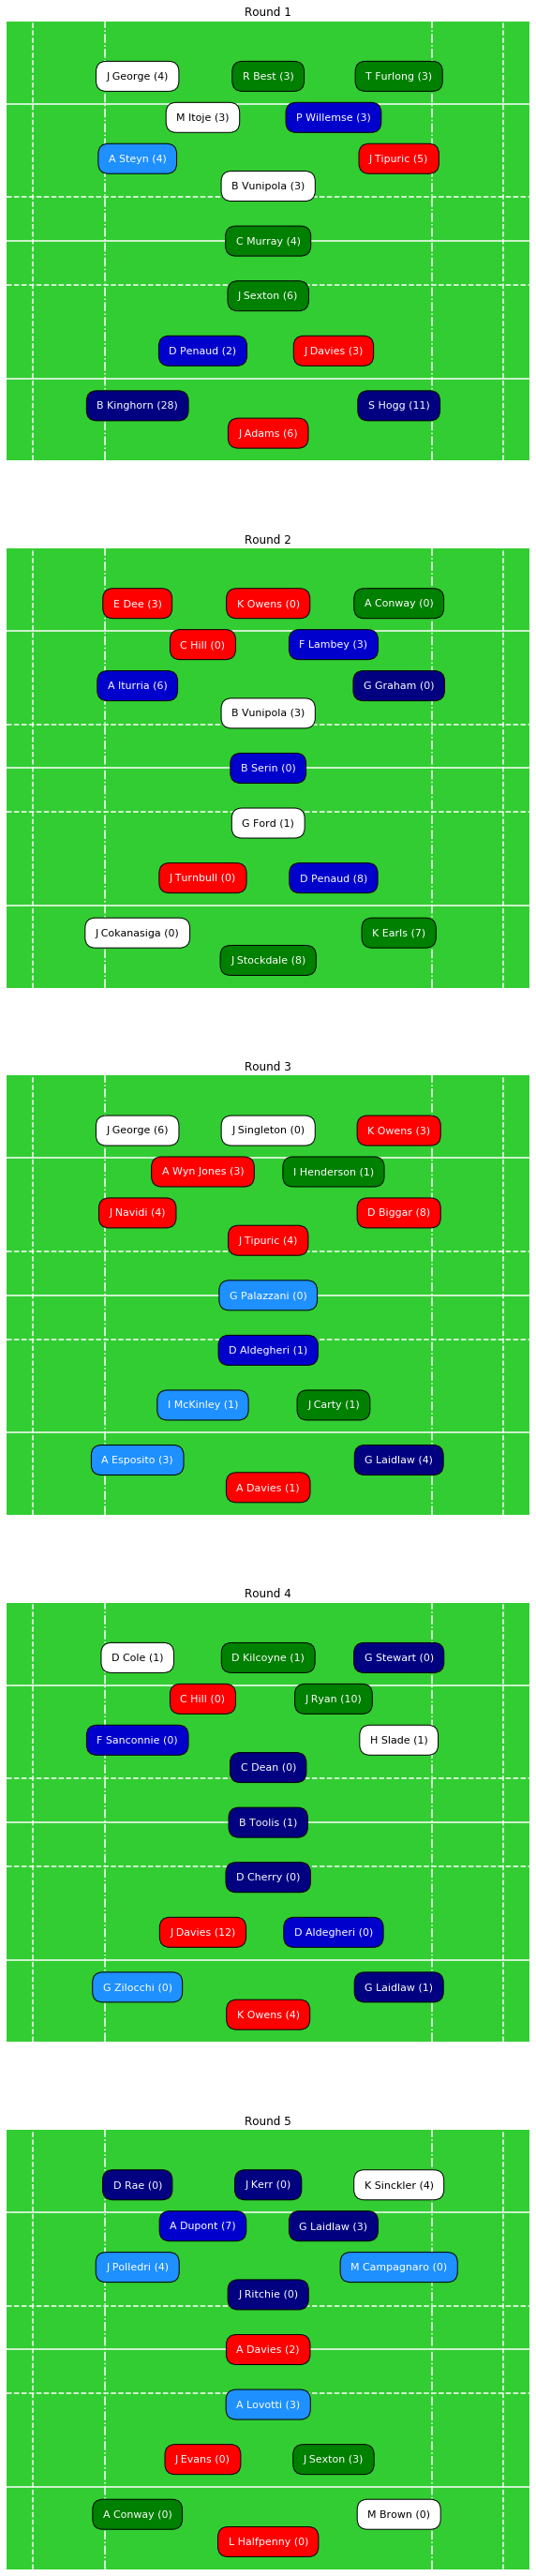

In [9]:
fig, ax = matplotlib.pyplot.subplots(figsize=(10,50), nrows=5, ncols=1)
for tournament_round in [1,2,3,4,5]:
    team_round = team_each_round[team_each_round['ROUND']==tournament_round]
    espn_fantasy_rugby.team_selector.show_team(team_round, ax[tournament_round-1])
    ax[tournament_round-1].set_title('Round {}'.format(tournament_round))
matplotlib.pyplot.show()

## How does the algorithm compare to other managers?

In [10]:
algorithm_results = pandas.DataFrame(
    team_each_round.groupby('ROUND')['MDP'].sum()
).reset_index()

algorithm_results['TOTAL_POINTS'] = algorithm_results['MDP'].cumsum()
algorithm_results

,ROUND,MDP,TOTAL_POINTS
0,1,88,88
1,2,39,127
2,3,40,167
3,4,31,198
4,5,26,224


In [ ]:
fig, ax = matplotlib.pyplot.subplots(figsize=(8,8))
seaborn.lineplot(
    data=manager_data,
    x='ROUND',
    y='TOTAL_POINTS',
    hue='MANAGER',
    **{
        'linewidth':1
    }
)
seaborn.lineplot(
    data=algorithm_results,
    x='ROUND',
    y='TOTAL_POINTS',
    **{
        'linewidth':1,
        'label':'Algorithm',
        'color':'black'
    }
)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('Round')
ax.set_ylabel('Total Tournament Points ')
ax.legend()
seaborn.despine()
matplotlib.pyplot.show()

### Run 1 round

In [ ]:
# import pulp

# first_player_vars = [espn_fantasy_rugby.team_selector.create_pulp_varnames(i) for i in first_round_players]
# first_player_vars

# player_forecasts = espn_fantasy_rugby.team_selector.get_results(
#     espn_data, features, target, 2
# )
# problem = espn_fantasy_rugby.team_selector.create_team_selection_problem(player_forecasts)
# problem = espn_fantasy_rugby.team_selector.add_nationality_constraint(problem, player_forecasts)
# problem = espn_fantasy_rugby.team_selector.add_position_constraint(problem, player_forecasts)

# number_changes = {
#     name: 1 if name in first_player_vars else 0 for name in player_forecasts['VARNAME']
# }


# c6 = pulp.LpConstraint(
#     e=pulp.lpSum(
#         [problem.variablesDict()[i]*number_changes[i] for i in problem.variablesDict().keys()]
#     ),
#     sense=1,
#     name='Changes',
#     rhs=12
# )
# c6_elastic = c6.makeElasticSubProblem(penalty = 50, proportionFreeBoundList = [0.1, 0.1])

# problem.extend(c6_elastic)

# # team = espn_fantasy_rugby.team_selector.get_team(problem, player_forecasts)

# problem.solve()
# print(pulp.LpStatus[problem.status])